In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Comparação dos diferentes autoencoders

## Losses customizadas

In [3]:
def mse_ssim(y_true, y_pred):
  mse = tf.reduce_mean(tf.square(y_true - y_pred))
  ssim = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.))
  return .9*mse + .1*ssim

In [4]:
def mse_ssim_charb_loss(y_true, y_pred):
  mse = tf.reduce_mean(tf.square(y_true - y_pred))
  ssim = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.))
  charbonnier = tf.reduce_mean(tf.sqrt(tf.square(y_true - y_pred) + tf.square(1e-3)))
  return .5*mse + .3*ssim + .2*charbonnier

## Carregamentos das samples e AEs

In [5]:
# Para autoencoders que usam input_shape=(176, 216, 3)
load = np.load('/content/drive/MyDrive/projetos/celebA_autoencoders/fixed_samples.npy')

fixed_samples = tf.reshape(load, (-1, 178, 218, 3)) # (10, 178, 218, 3)
fixed_samples = tf.image.resize(fixed_samples, (176, 216)) # (10, 176, 216, 3)
fixed_samples = tf.reshape(fixed_samples, (5, 2, 176, 216, 3)).numpy() # (5, 2, 176, 216, 3)
fixed_samples = np.clip(fixed_samples, 0., 1.)

In [6]:
# Para shallow AE que usa input_shape=(45, 55, 3)
shallow_samples = tf.reshape(load, (-1, 178, 218, 3)) # (10, 178, 218, 3)
shallow_samples = tf.image.resize(shallow_samples, (45, 55)) # (10, 45, 55, 3)
shallow_samples = tf.reshape(shallow_samples, (5, 2, -1)).numpy() # (5, 2, 7425)
shallow_samples = np.clip(shallow_samples, 0., 1.)

In [7]:
# Para deep AE que usa input_shape=(36, 44, 3)
deep_samples = tf.reshape(load, (-1, 178, 218, 3)) # (10, 178, 218, 3)
deep_samples = tf.image.resize(deep_samples, (36, 44)) # (10, 36, 44, 3)
deep_samples = tf.reshape(deep_samples, (5, 2, -1)).numpy() # (5, 2, 7452)
deep_samples = np.clip(deep_samples, 0., 1.)

In [8]:
shallow_AE = load_model('/content/drive/MyDrive/projetos/celebA_autoencoders/shallow_autoencoder/shallow_autoencoder.keras')

In [9]:
deep_AE = load_model('/content/drive/MyDrive/projetos/celebA_autoencoders/deep_autoencoder/deep_autoencoder.keras')

In [10]:
conv_AE = load_model('/content/drive/MyDrive/projetos/celebA_autoencoders/convolutional_autoencoder/conv_autoencoder.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 54 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
denoising_AE = load_model('/content/drive/MyDrive/projetos/celebA_autoencoders/denoising_autoencoder/denoising_autoencoder.keras', custom_objects={'mse_ssim': mse_ssim})

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 150 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
sparse_AE = load_model('/content/drive/MyDrive/projetos/celebA_autoencoders/sparse_autoencoder/sparse_autoencoder.keras')

In [13]:
resUnet_AE = load_model('/content/drive/MyDrive/projetos/celebA_autoencoders/resUnet_autoencoder/resUnet_autoencoder.keras', custom_objects={'mse_ssim_charb_loss': mse_ssim_charb_loss})

## Comparação entre os Autoencoders

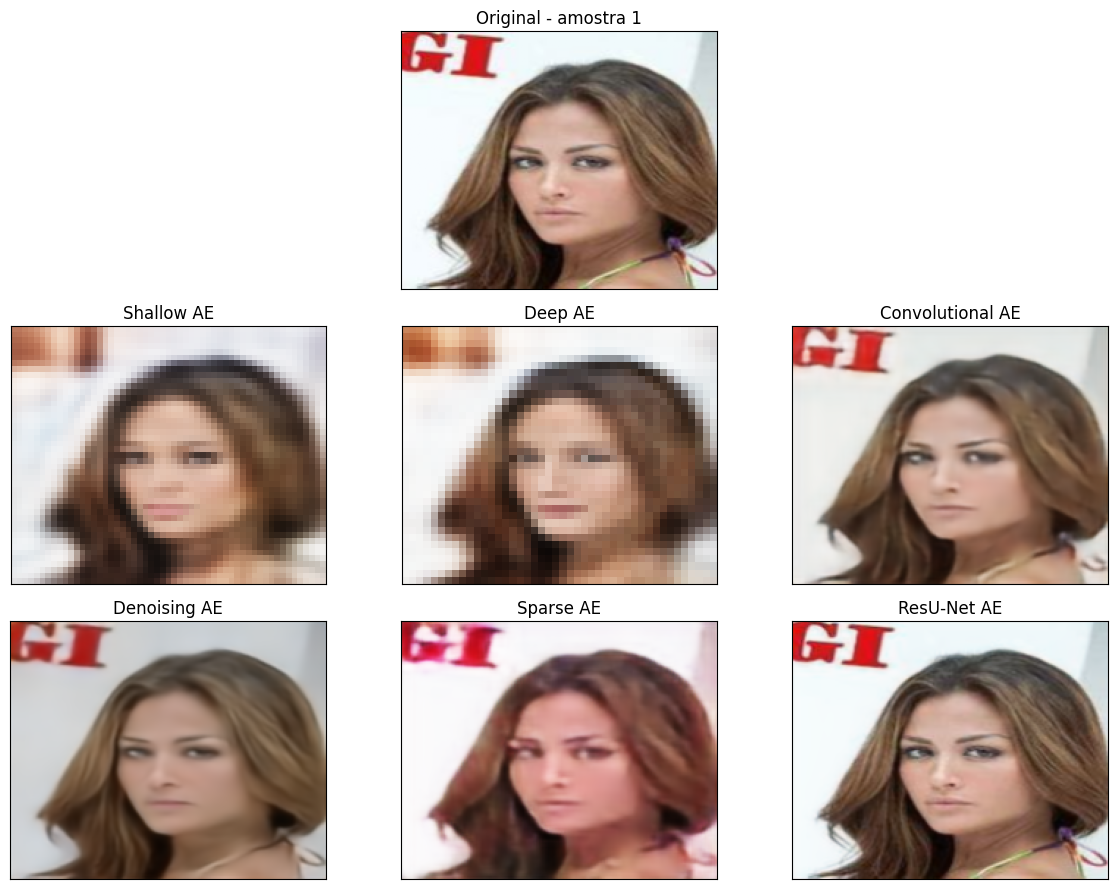

In [20]:
index = 0
sample, _ = fixed_samples[index]
sample = tf.expand_dims(sample, axis=0)
plt.figure(figsize=(12, 9))

# Imagem original
plt.subplot(3, 3, 2)
plt.imshow(tf.reshape(sample, (176, 216, 3)))
plt.xticks(())
plt.yticks(())
plt.title('Original - amostra 1')

# Shallow Autoencoder
sh_sample = tf.expand_dims(shallow_samples[index][0], axis=0)
sh_predict = shallow_AE.predict(sh_sample, verbose=False)
plt.subplot(3, 3, 4)
plt.imshow(tf.reshape(sh_predict, (45, 55, 3)))
plt.xticks(())
plt.yticks(())
plt.title('Shallow AE')

# Deep Autoencoder
dp_sample = tf.expand_dims(deep_samples[index][0], axis=0)
dp_predict = deep_AE.predict(dp_sample, verbose=False)
plt.subplot(3, 3, 5)
plt.imshow(tf.reshape(dp_predict, (36, 44, 3)))
plt.xticks(())
plt.yticks(())
plt.title('Deep AE')

# Convolutional Autoencoder
conv_predict = conv_AE.predict(sample, verbose=False)
plt.subplot(3, 3, 6)
plt.imshow(np.reshape(conv_predict, (176, 216, 3)).astype('float32'))
plt.xticks(())
plt.yticks(())
plt.title('Convolutional AE')

# Denoising Autoencoder
den_predict = denoising_AE.predict(sample+np.random.normal(scale=.15, size=sample.shape), verbose=False)
plt.subplot(3, 3, 7)
plt.imshow(np.reshape(den_predict, (176, 216, 3)).astype('float32'))
plt.xticks(())
plt.yticks(())
plt.title('Denoising AE')

# Sparse Autoencoder
sparse_predict = sparse_AE.predict(sample, verbose=False)
plt.subplot(3, 3, 8)
plt.imshow(np.reshape(sparse_predict, (176, 216, 3)).astype('float32'))
plt.xticks(())
plt.yticks(())
plt.title('Sparse AE')

# ResU-net AE
resUnet_predict = resUnet_AE.predict(sample, verbose=False)
plt.subplot(3, 3, 9)
plt.imshow(np.reshape(resUnet_predict, (176, 216, 3)).astype('float32'))
plt.xticks(())
plt.yticks(())
plt.title('ResU-Net AE')

plt.tight_layout()
plt.show()
plt.close();